### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


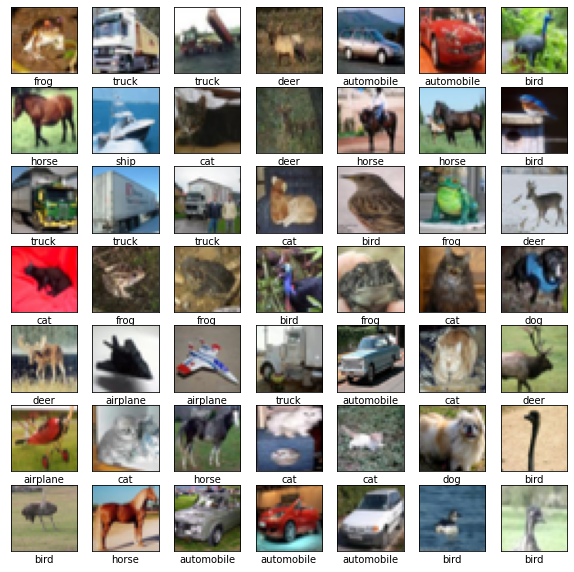

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 1. B & W

In [6]:
from skimage.color import rgb2gray
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

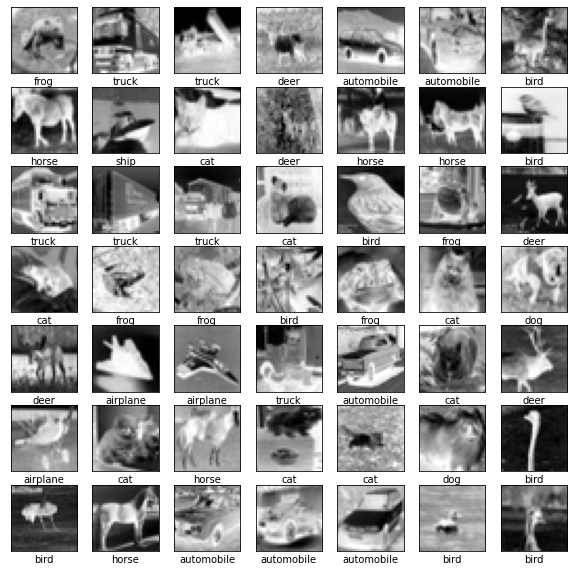

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
train_images = train_images.reshape(50000, 32, 32, 1)
test_images = test_images.reshape(10000, 32, 32, 1)

In [9]:
test_images.shape

(10000, 32, 32, 1)

### 1. CNN

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,  # nº de neuronas
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), # Preprocesamiento/Te lo transforma a vector
    keras.layers.Dense(32, activation='relu'), # Una capa con 128 neuronas
    keras.layers.Dense(10) # Una capa con 10 neuronas
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
____________________________________________________

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 3.3907 - accuracy: 0.1298
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.1013
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3026 - accuracy: 0.1017
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3026 - accuracy: 0.1015
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1015
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1015
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1016
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1017
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1017
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 2.3026 - accuracy: 0.1006

Test accuracy: 0.1005999967455864


### 2. CNN

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters=8,  # nº de neuronas
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(16))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 3.7768 - accuracy: 0.1620
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.1791 - accuracy: 0.2141
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.2861 - accuracy: 0.1044
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2598 - accuracy: 0.1060
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2869 - accuracy: 0.1144
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2921 - accuracy: 0.1143
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2913 - accuracy: 0.1005
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3021 - accuracy: 0.1020
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3021 - accuracy: 0.1163
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 2.3026 - accuracy: 0.1257

Test accuracy: 0.1256999969482422


### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,  # nº de neuronas
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), # Preprocesamiento/Te lo transforma a vector
    keras.layers.Dense(32, activation='relu'), # Una capa con 128 neuronas
    keras.layers.Dense(10) # Una capa con 10 neuronas
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
____________________________________________________

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.6789 - accuracy: 0.1080
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3041 - accuracy: 0.1063
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3073 - accuracy: 0.0955
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 2.3026 - accuracy: 0.0871
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.0884
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3026 - accuracy: 0.0884
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3026 - accuracy: 0.0885
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.0889
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.0883
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - 

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 2.3026 - accuracy: 0.0878

Test accuracy: 0.08780000358819962


### RESPUESTA

Es mejor en B&W con más capas, aunque no dan resultados muy buenos. 